In [ ]:
'''
This script processes and analyzes text data from articles to identify the occurrence of specific keywords
When pre-defining keywords for analysis it introduces potenital bias, which can lead to skewed interpretations. 
Which is why the results from this script were not used in final presentation. 
'''

In [1]:
# Importing libraries 

import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Examining full dataset without truncation 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

In [7]:
df = pd.read_csv('/Users/rachelgupta/Desktop/NAACP - PIT NE/pitne-bias-in-media/summer24/notebooks/Rachel/final_combined2.csv')

In [8]:
df.head()

,hl1_x,body,position_section,position_subsection,author,year,longitude,latitude,Tracts,T_Total,T_White alone,T_Black or African American alone,T_American Indian and Alaska Native alone,T_Asian alone,T_Native Hawaiian and Other Pacific Islander alone,T_Some Other Race alone,T_Population of two or more races,T_Total Hispanic or Latino origin,T_Not Hispanic or Latino,T_Hispanic or Latino,Article_Count,T_majority_race,Neighborhood,White alone,Black or African American alone,Hispanic or Latino,"Asian, Native Hawaiian and Pacific Islander",Other Races or Multiple Races,majority_race
0,cerezyme alternative gets fda approval,washington the food and drug administration ha...,BUSINESS,unknown,Associated Press,2010.0,-71.118563,42.362780,803.0,6584.0,4333.0,405.0,10.0,1415.0,1.0,133.0,287.0,6584.0,6008.0,576.0,35.0,T_White alone,Allston,12536.0,1326.0,3259.0,6271.0,1512.0,White alone
1,taking her own advice,while mckelle harbored big time ambitions her ...,G,Living Arts,unknown,2010.0,-71.118116,42.360262,803.0,6584.0,4333.0,405.0,10.0,1415.0,1.0,133.0,287.0,6584.0,6008.0,576.0,35.0,T_White alone,Allston,12536.0,1326.0,3259.0,6271.0,1512.0,White alone
2,terriers are triple threats vs. albany,as result shooting percentages tend to suffer ...,SPORTS,unknown,unknown,2010.0,-71.117705,42.352197,803.0,6584.0,4333.0,405.0,10.0,1415.0,1.0,133.0,287.0,6584.0,6008.0,576.0,35.0,T_White alone,Allston,12536.0,1326.0,3259.0,6271.0,1512.0,White alone
3,10 are hurt as van overturns on mass. pike,marie eveillard 53 of brockton was taken by me...,NEWS,Metro,unknown,2010.0,-71.119302,42.356444,803.0,6584.0,4333.0,405.0,10.0,1415.0,1.0,133.0,287.0,6584.0,6008.0,576.0,35.0,T_White alone,Allston,12536.0,1326.0,3259.0,6271.0,1512.0,White alone
4,sanofi presses genzymeover takeover bid,in letter released yesterday sanofi aventis re...,BUSINESS,unknown,unknown,2010.0,-71.118563,42.362780,803.0,6584.0,4333.0,405.0,10.0,1415.0,1.0,133.0,287.0,6584.0,6008.0,576.0,35.0,T_White alone,Allston,12536.0,1326.0,3259.0,6271.0,1512.0,White alone


In [9]:
# Ensure the 'body' column is a string
df['body'] = df['body'].astype(str)

In [10]:
keywords = [
    'thug','hoodlum', 'inner city', 'blacks', 'gang', 'public housing', 'out of control', 'xenophobic'
    'exploded', 'Black', 'crime', 'riot', 'police', 'underprivileged', 'killed', 'killings', 'bigoted'
]

In [11]:
# Function to count occurrences of keywords in article text
def count_keywords(text, keywords):
    count = 0
    for word in keywords:
        count += text.lower().count(word.lower())
    return count

In [12]:
# Initialize a dictionary to store keyword counts by neighborhood
neighborhood_counts = {neighborhood: {keyword: 0 for keyword in keywords} for neighborhood in df['Neighborhood'].unique()}

In [13]:
# Count keywords occurrences for each neighborhood
for index, row in df.iterrows():
    neighborhood = row['Neighborhood']
    text = row['body']
    for keyword in keywords:
        neighborhood_counts[neighborhood][keyword] += count_keywords(text, [keyword])

In [14]:
# Convert dictionary to DataFrame for easier plotting
df_counts = pd.DataFrame(neighborhood_counts).transpose()

In [15]:
df_counts

,thug,hoodlum,inner city,blacks,gang,public housing,out of control,xenophobicexploded,Black,crime,riot,police,underprivileged,killed,killings,bigoted
Allston,0,0,0,1,5,0,0,0,19,18,9,92,0,15,5,0
North End,17,3,17,84,335,56,37,0,1499,1098,653,3665,6,710,78,2
NaN,8,0,9,36,99,16,15,0,732,410,962,1696,4,326,33,1
Brighton,0,0,1,13,9,0,0,0,48,11,52,91,1,22,3,0
South Boston Waterfront,0,0,1,4,9,22,0,0,127,14,27,145,1,54,0,0
West End,1,0,2,12,24,1,3,0,317,36,188,214,0,132,3,0
Back Bay,0,0,0,1,9,1,1,0,160,23,82,216,0,59,7,0
Fenway,2,0,0,5,16,0,3,0,149,57,182,102,1,47,0,0
Hyde Park,0,0,5,0,5,0,0,0,5,11,2,56,0,11,1,0
Jamaica Plain,1,0,2,10,30,1,0,0,90,36,19,104,0,15,3,1


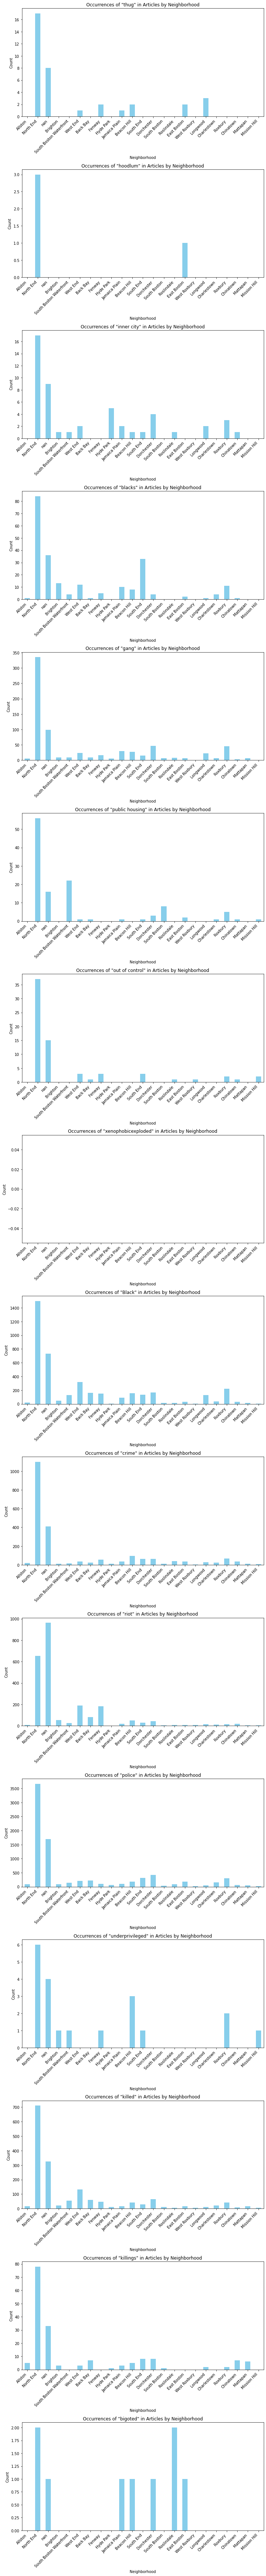

In [16]:
# Plotting the results
fig, axes = plt.subplots(nrows=len(keywords), ncols=1, figsize=(10, 6 * len(keywords)))

for i, keyword in enumerate(keywords):
    ax = axes[i]
    df_counts[keyword].plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Occurrences of "{keyword}" in Articles by Neighborhood')
    ax.set_xlabel('Neighborhood')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

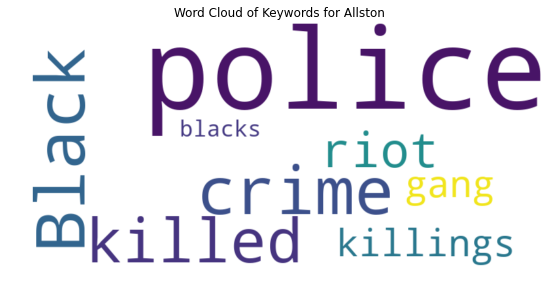

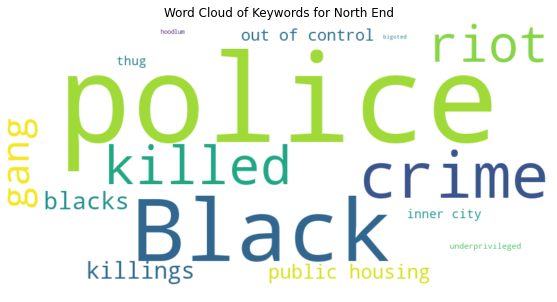

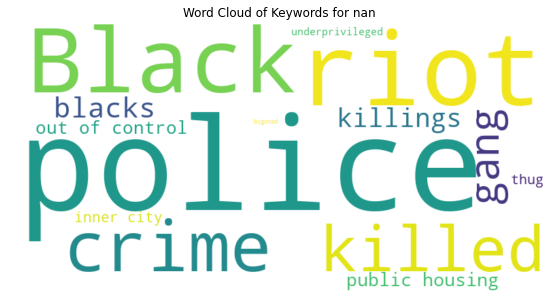

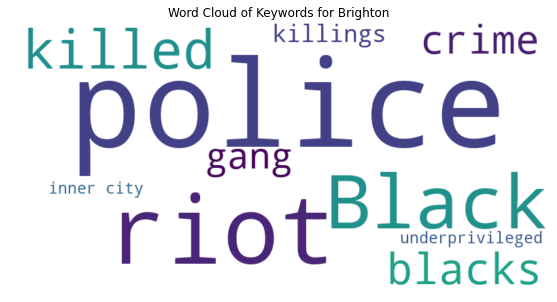

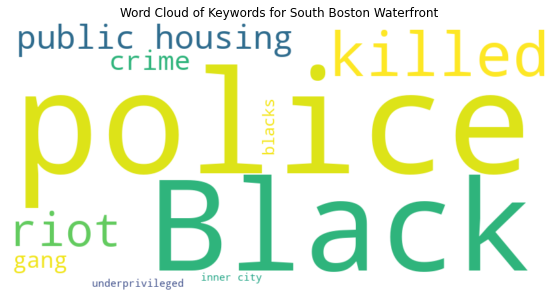

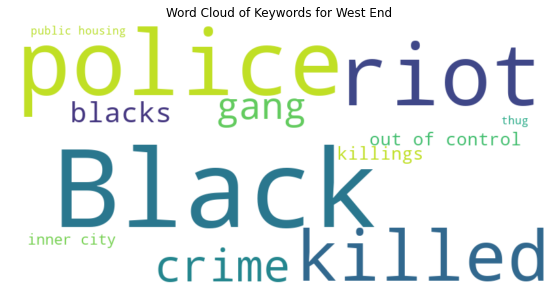

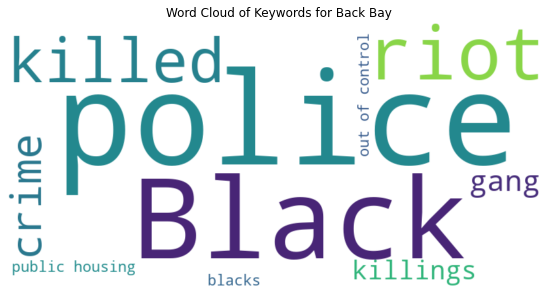

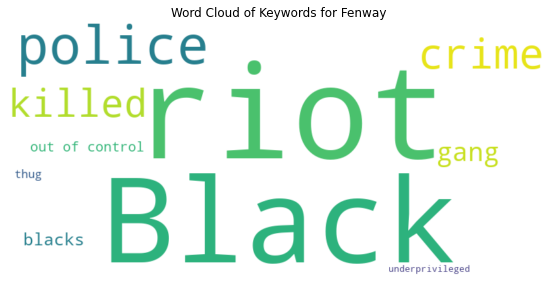

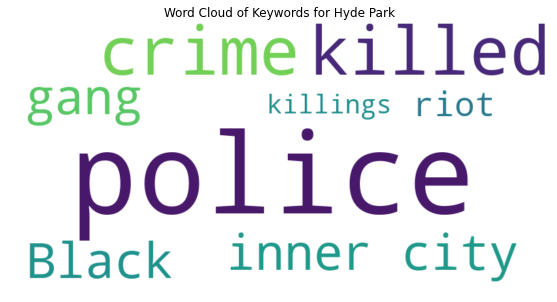

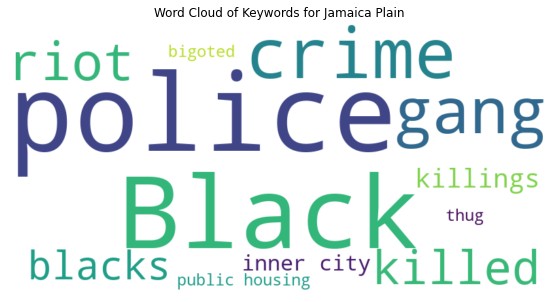

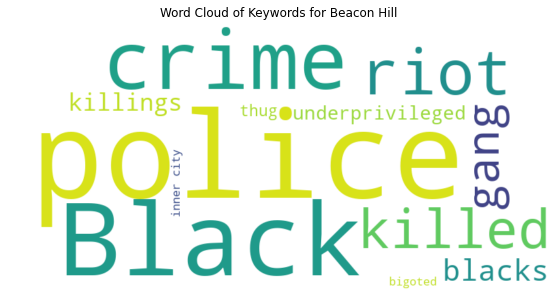

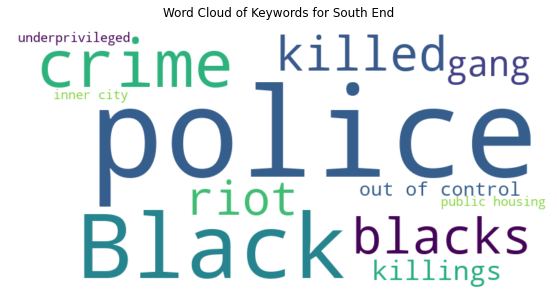

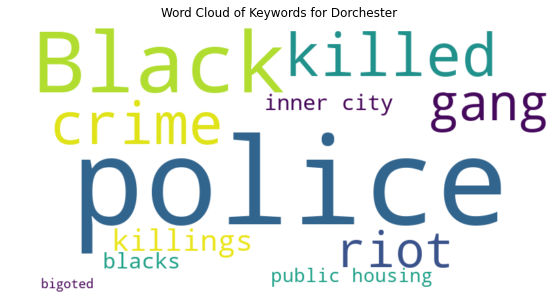

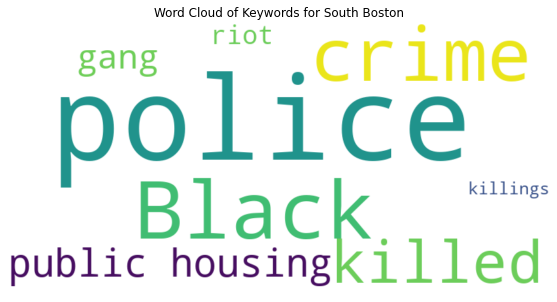

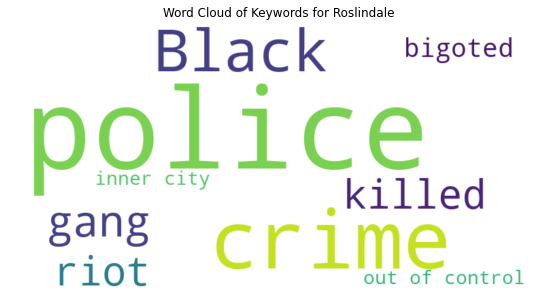

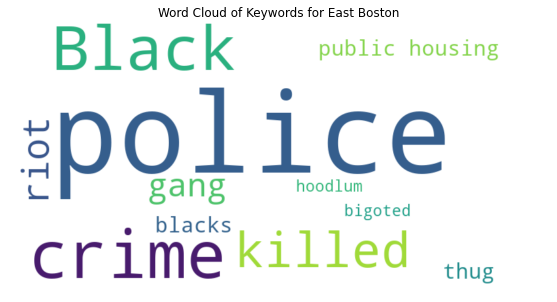

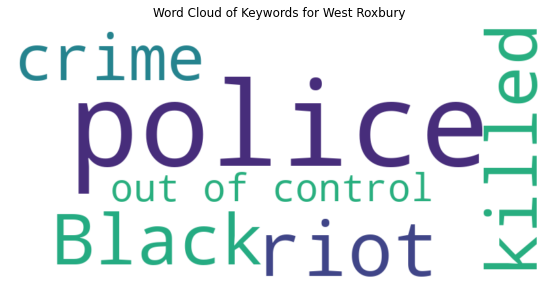

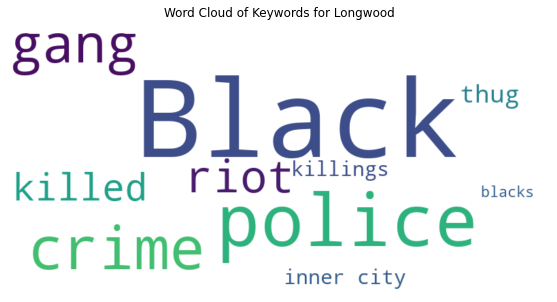

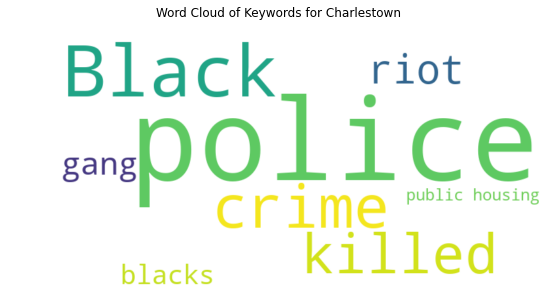

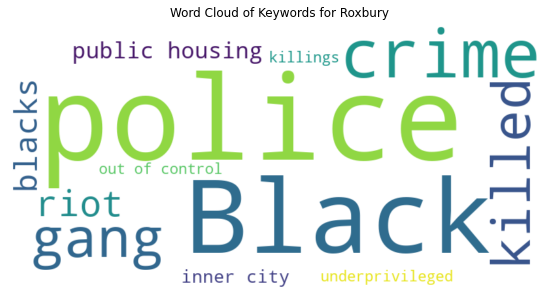

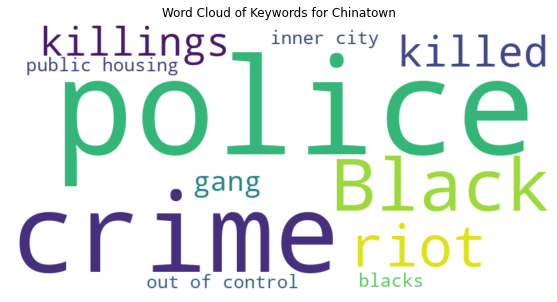

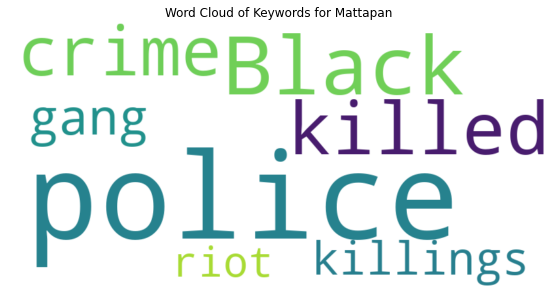

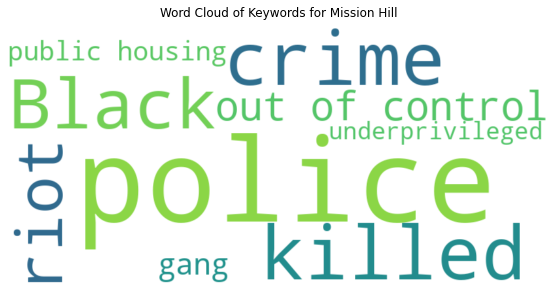

In [17]:
# Generating word cloud for each neighborhood
for neighborhood, keyword_count in neighborhood_counts.items():
    all_keywords = {keyword: count for keyword, count in keyword_count.items() if count > 0}
    if all_keywords:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(all_keywords)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud of Keywords for {neighborhood}')
        plt.axis('off')
        plt.show()
    else:
        print(f'No keywords found for {neighborhood}')

In [6]:

# Initializing VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to check for keywords in the text and perform sentiment analysis
def analyze_keywords_and_sentiment(text, keywords):
    sentences_with_keywords = []
    keyword_counts = {keyword: 0 for keyword in keywords}
    polarity_sum = 0
    sentence_count = 0

    # Split text into sentences
    sentences = text.split('.')
    for sentence in sentences:
        for keyword in keywords:
            if keyword in sentence:
                sentences_with_keywords.append(sentence)
                keyword_counts[keyword] += 1
                sentiment = sid.polarity_scores(sentence)['compound']
                polarity_sum += sentiment
                sentence_count += 1

    # Calculating average sentiment
    avg_sentiment = polarity_sum / sentence_count if sentence_count else 0
    return keyword_counts, avg_sentiment



In [7]:
# Initializing columns for results
df['keyword_counts'] = df['body'].apply(lambda x: analyze_keywords_and_sentiment(x, keywords)[0])
df['avg_sentiment'] = df['body'].apply(lambda x: analyze_keywords_and_sentiment(x, keywords)[1])



In [9]:
# Displaying the updated DataFrame
df[['Neighborhood', 'keyword_counts', 'avg_sentiment']].head()

,Neighborhood,keyword_counts,avg_sentiment
0,West End,"{'hoodlum': 0, 'inner city': 0, 'blacks': 0, '...",0.000000
1,West End,"{'hoodlum': 0, 'inner city': 0, 'blacks': 0, '...",0.076757
2,West End,"{'hoodlum': 0, 'inner city': 0, 'blacks': 0, '...",0.000000
3,West End,"{'hoodlum': 0, 'inner city': 0, 'blacks': 0, '...",0.000000
4,West End,"{'hoodlum': 0, 'inner city': 0, 'blacks': 0, '...",0.000000


In [16]:
df.head()

,Unnamed: 0,hl1_x,body,llama_prediction,Explicit_Pass_1,NER_Pass_1,NER_Pass_1_Sorted,NER_Pass_1_Coordinates,NER_prediction,NER_Sorted,NER_Sorted_Coordinates,position_section,position_subsection,hl1_y,hl2,author,lede,pub_date,indexing_terms,year,actual_body_word_count,body_cleaned,longitude,latitude,Tract,T_Total,T_White alone,T_Black or African American alone,T_American Indian and Alaska Native alone,T_Asian alone,T_Native Hawaiian and Other Pacific Islander alone,T_Some Other Race alone,T_Population of two or more races,T_Total Hispanic or Latino origin,T_Not Hispanic or Latino,T_Hispanic or Latino,tract,Article_Count,T_majority_race,Calculated_Tract,Neighborhood,White alone,Black or African American alone,Hispanic or Latino,"Asian, Native Hawaiian and Pacific Islander",Other Races or Multiple Races,majority_race
0,0.0,chara is in good company among old reliables,body over time and through his consistency as ...,1. Y - The article is talking about a specif...,NaN,"[(one, 'CARDINAL'), (21st, 'ORDINAL'), (slovak...","[(nhl, 'ORG'), (red wings, 'ORG'), (chara, 'OR...",NaN,"[(1, 'CARDINAL'), (Boston, 'GPE'), (Massachuse...","[('the TD Garden', 'FAC'), ('TD Garden', 'FAC'...","[-71.062146, 42.366198]",SPORTS,unknown,chara is in good company among old reliables,unknown,unknown,"on nov. 19, 1997, barely a month before his cu...",2019-05-30,"{'subject': [{'score': '90', 'classCode': 'STX...",2019.0,509.0,"body time , consistency one league ' top defen...",-71.062146,42.366198,20303.0,3400.0,2364.0,575.0,6.0,331.0,1.0,43.0,80.0,3400.0,3027.0,373.0,20303.0,345.0,T_White alone,20303.0,West End,4933.0,338.0,613.0,1440.0,381.0,White alone
1,1.0,in this series blues are america team,body we are rooting against boston wrote mike ...,Based on the information provided in the art...,NaN,"[(boston, 'GPE'), (mike vaccaro, 'PERSON'), (n...","[(bruins, 'ORG'), (belichick, 'ORG'), (the st....",NaN,"[(Boston, 'GPE'), (Massachusetts, 'GPE'), (1, ...","[('the TD Garden', 'FAC'), ('TD Garden', 'FAC'...","[-71.062146, 42.366198]",SPORTS,unknown,in this series blues are america team,unknown,unknown,bruins defenseman brandon carlo desperately tr...,2019-05-30,"{'subject': [{'score': '89', 'classCode': 'STX...",2019.0,930.0,"body rooting boston , wrote mike vaccaro new y...",-71.062146,42.366198,20303.0,3400.0,2364.0,575.0,6.0,331.0,1.0,43.0,80.0,3400.0,3027.0,373.0,20303.0,345.0,T_White alone,20303.0,West End,4933.0,338.0,613.0,1440.0,381.0,White alone
2,17.0,hospitality giant eyes betting on pro sports,body amy latimer president of the delaware nor...,Based on the information provided in the art...,NaN,"[(amy latimer, 'PERSON'), (delaware, 'GPE'), (...","[(td garden, 'ORG'), (latimer, 'ORG'), (the us...",NaN,"[(Boston, 'GPE'), (Massachusetts, 'GPE'), (TD ...","[('TD Garden', 'FAC'), ('TD Garden', 'FAC'), (...","[-71.062146, 42.366198]",NEWS,Metro,hospitality giant eyes betting on pro sports,some see potential conflicts of interest,unknown,delaware north is a multibillion-dollar hospit...,2019-05-30,"{'subject': [{'score': '89', 'classCode': 'STX...",2019.0,748.0,"body amy latimer , president delaware north- o...",-71.062146,42.366198,20303.0,3400.0,2364.0,575.0,6.0,331.0,1.0,43.0,80.0,3400.0,3027.0,373.0,20303.0,345.0,T_White alone,20303.0,West End,4933.0,338.0,613.0,1440.0,381.0,White alone
3,33.0,coyle recalls garden memory in super,body if you re asking what the super well then...,Based on the information provided in the art...,NaN,"[(mass, 'GPE'), (coyle, 'PERSON'), (coyle, 'PE...","[(weymouth, 'ORG'), (catholic memorial, 'ORG')...",NaN,"[(Boston, 'GPE'), (Massachusetts, 'GPE'), (the...","[('the TD Garden', 'FAC'), ('TD Garden', 'FAC'...","[-71.062146, 42.366198]",SPORTS,unknown,coyle recalls garden memory in super,unknown,unknown,charlie coyle played his first stanley cup fin...,2019-05-30,"{'subject': [{'score': '90', 'classCode': 'STX...",2019.0,372.0,"body ' asking , ' super 8 ? well , ' mass . co...",-71.062146,42.366198,20303.0,3400.0,2364.0,57